In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


In [ ]:
# Load the Iris dataset
data= load_iris()

In [ ]:
# Prepare the data
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model training and hyperparameter tuning
model= SVC()
model.fit(X_train, y_train)

param_grid = {
    'C': [ 1, 3, 5, 7, 9],
    'gamma': ['auto','scale'],
    'kernel': ['linear', 'rbf']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print results in DataFrame format
results= pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:", results[['params', 'mean_test_score', 'std_test_score',
                                       'param_gamma','param_kernel','param_C']]
                                        .sort_values(by='mean_test_score', ascending=False))

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Grid Search Results:                                             params  mean_test_score  \
0    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}         0.952381   
2   {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}         0.952381   
6   {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}         0.952381   
4    {'C': 3, 'gamma': 'auto', 'kernel': 'linear'}         0.952381   
14  {'C': 7, 'gamma': 'scale', 'kernel': 'linear'}         0.952381   
12   {'C': 7, 'gamma': 'auto', 'kernel': 'linear'}         0.952381   
10  {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}         0.952381   
8    {'C': 5, 'gamma': 'auto', 'kernel': 'linear'}         0.952381   
17      {'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}         0.942857   
15     {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}         0.942857   
18  {'C': 9, 'gamma': 'scale', 'kernel': 'linear'}         0.942857   
16   {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}         0.942857   
3      {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}      

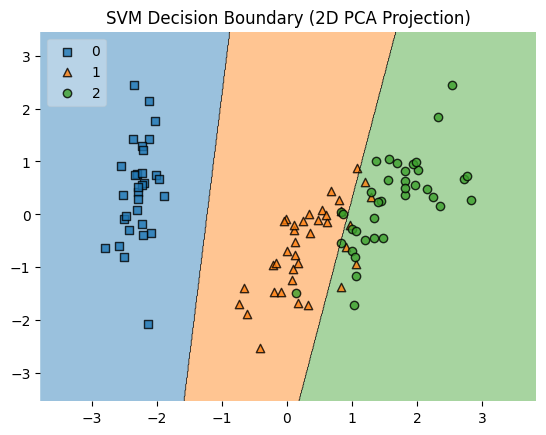

In [ ]:
# Visualize decision boundaries using PCA for 2D projection
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_model_2d = SVC(**grid_search.best_params_)
best_model_2d.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, clf=best_model_2d, legend=2)
plt.title("SVM Decision Boundary (2D PCA Projection)")
plt.show()